<a href="https://colab.research.google.com/github/ankur-omar/Singlylinkedlistimplementation/blob/master/clothesclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

import numpy as np
#fashion_mnist = tf.keras.datasets.fashion_mnist
from keras.datasets import fashion_mnist



In [0]:
(x_train,y_train),(x_test,y_test) =fashion_mnist.load_data()


In [0]:
print("TRAINING DATA  ", str(len(x_train)))
print("labels in training data ",str(len(x_test)))
print("dimensions of a single image in x_train ",str(x_train[0].shape))

print("testing data  ", str(len(x_test)))
print("labels in testing data ",str(len(y_test)))
print("dimensions of a single image in y_train ",str(x_test[0].shape))

TRAINING DATA   60000
labels in training data  10000
dimensions of a single image in x_train  (28, 28)
testing data   10000
labels in testing data  10000
dimensions of a single image in y_train  (28, 28)


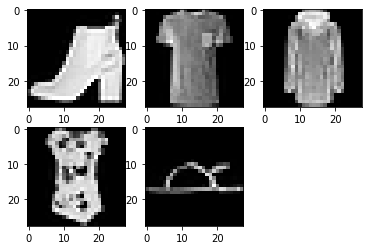

In [0]:
import matplotlib.pyplot as plt
plt.subplot(231)
random_n =np.random.randint(0,len(x_train))
plt.imshow(x_train[random_n],cmap =plt.get_cmap('gray'))

plt.subplot(232)
random_n =np.random.randint(0,len(x_train))
plt.imshow(x_train[random_n],cmap =plt.get_cmap('gray'))

plt.subplot(233)
random_n =np.random.randint(0,len(x_train))
plt.imshow(x_train[random_n],cmap =plt.get_cmap('gray'))

plt.subplot(234)
random_n =np.random.randint(0,len(x_train))
plt.imshow(x_train[random_n],cmap =plt.get_cmap('gray'))

plt.subplot(235)
random_n =np.random.randint(0,len(x_train))
plt.imshow(x_train[random_n],cmap =plt.get_cmap('gray'))
plt.show()



In [0]:
from keras.utils import np_utils#it is used to convert array of labeled data to one hot encoded vector
import keras
from keras import Sequential
from  keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
import keras.backend as K



batch_size =128#the number of samples that will be propagated through network
epochs =100

img_row =x_train[0].shape[0]
img_col =x_train[1].shape[1]


x_train =x_train.reshape(x_train.shape[0],img_row,img_col,1)
#print(x_train)
x_test =x_test.reshape(x_test.shape[0],img_row,img_col,1)
#print(x_test)
input_shape =(img_row,img_col,1)
print(input_shape)


x_train =x_train.astype('float32')
x_test =x_test.astype('float32')
x_train =x_train/255
x_test =x_test/255
#ONE HOT ENCODING
y_train =np_utils.to_categorical(y_train)
#print(y_train)


y_test =np_utils.to_categorical(y_test)
#print(y_test)

#CALCULATE THE NUMBER OF  CLASSES AND NUMBER OF pixels
n_classes =y_test.shape[1]
print("number of classes is " ,n_classes)
n_pixel =x_train.shape[1]*x_train.shape[2]
print("number of pixel is ",n_pixel)



(28, 28, 1)
number of classes is  10
number of pixel is  784


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,activation='relu',input_shape =(28,28,1)),
    tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(64,3,activation='relu',input_shape =(28,28,1)),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(n_classes, activation='softmax')

])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [0]:
model_fitting = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
469/469 - 9s - loss: 0.4331 - accuracy: 0.8508 - val_loss: 2.8533 - val_accuracy: 0.4320
Epoch 2/100
469/469 - 8s - loss: 0.2758 - accuracy: 0.9027 - val_loss: 0.3129 - val_accuracy: 0.8898
Epoch 3/100
469/469 - 8s - loss: 0.2319 - accuracy: 0.9165 - val_loss: 0.2497 - val_accuracy: 0.9101
Epoch 4/100
469/469 - 8s - loss: 0.2057 - accuracy: 0.9258 - val_loss: 0.2416 - val_accuracy: 0.9107
Epoch 5/100
469/469 - 8s - loss: 0.1848 - accuracy: 0.9322 - val_loss: 0.2294 - val_accuracy: 0.9167
Epoch 6/100
469/469 - 8s - loss: 0.1702 - accuracy: 0.9380 - val_loss: 0.2256 - val_accuracy: 0.9183
Epoch 7/100
469/469 - 8s - loss: 0.1540 - accuracy: 0.9443 - val_loss: 0.2142 - val_accuracy: 0.9234
Epoch 8/100
469/469 - 8s - loss: 0.1419 - accuracy: 0.9483 - val_loss: 0.2380 - val_accuracy: 0.9168
Epoch 9/100
469/469 - 8s - loss: 0.1313 - accuracy: 0.9516 - val_loss: 0.2160 - val_accuracy: 0.9239
Epoch 10/100
469/469 - 8s - loss: 0.1207 - accuracy: 0.9555 - val_loss: 0.2214 - val_accura

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.19-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.19-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.19-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/clothing_project")

In [0]:
model.save("clothes_classification.h5")

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#from keras.models import load_model
import tensorflow as tf


def load_image(filename):
    img =load_img(filename,grayscale =True,target_size =(28,28))
    img =img_to_array(img)
    img =img.reshape(1,28,28,1)
    img =img.astype('float32')
    img =img/255.0
    return img
img = load_image('ankel boot.jpg')
model = tf.keras.models.load_model('clothes_classification.h5')
class_prediction = model.predict_classes(img)
print(class_prediction[0])

if class_prediction[0]==0:
            product ="T-shirt/top"
elif class_prediction[0]==1:
          product ="Trouser"
elif class_prediction[0]==2:
           product ="Pullover"
elif class_prediction[0]==3:
         product ="Dress"
elif class_prediction[0]==4:
          product ="Coat"
elif class_prediction[0]==5:
      product ="Sandal"
elif class_prediction[0]==6:
          product ="Shirt"
elif class_prediction[0]==7:
          product ="Sneaker"
elif class_prediction[0]==8:
          product ="Bag"
else:
  product="Ankel boot"

print(product)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


4
Coat
